# What then is underfitting, or overfitting for that matter?
Let’s train some models that under and overfit data!
We’ll start by generating a dataset with sklearn’s “make_classification” function. Each datapoint will have 2 features (so it’s easily plottable) and a label.

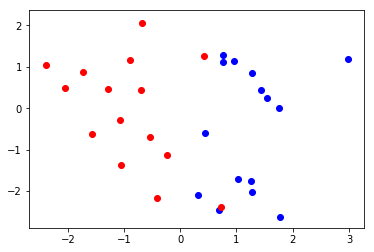

In [3]:
import numpy as np
from sklearn.datasets import make_classification
# We didn't need to display all params but I like to see defaults
# I've edited some of these
X,y = make_classification(
    n_samples=30, 
    n_features=2, 
    n_informative=2,
    n_redundant=0,
    n_repeated=0, 
    n_classes=2, 
    n_clusters_per_class=2, 
    weights=None, 
    flip_y=0.01, 
    class_sep=1.0, 
    hypercube=True, 
    shift=0.0, 
    scale=1.0, 
    shuffle=True, 
    random_state=None
)
# Split examples by class (positive/negative) to give diff colors
pos_feat0 = []
pos_feat1 = []
neg_feat0 = []
neg_feat1 = []
for idx,klass in enumerate(y):
    if klass == 1:
        pos_feat0.append(X[idx][0])
        pos_feat1.append(X[idx][1])
    else:
        neg_feat0.append(X[idx][0])
        neg_feat1.append(X[idx][1])
# And plot them
import matplotlib.pyplot as plt
plt.scatter(pos_feat0,pos_feat1, c='blue')
plt.scatter(neg_feat0,neg_feat1, c='red')

Boom. We have data.
Now we’ll walk through the definitions of under and overfitting, then intentionally pick algorithms that will under and over fit the data.

# Underfitting

Underfitting occurs when a statistical model cannot adequately capture the underlying structure of the data.
Translation: The model couldn’t find a reliable pattern in the data. That doesn’t mean there isn’t a pattern. Just that the model couldn’t find one.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


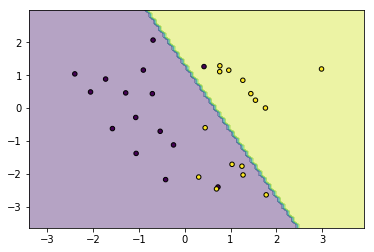

In [4]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model.fit(X, y)
# set min and max values for the x and y axes
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
a = np.arange(x_min, x_max, 0.1)
b = np.arange(y_min, y_max, 0.1)
# build a grid of each unique combination of x and y
xx, yy = np.meshgrid(a, b)
# make predictions for every combination of x and y on that grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# draw the classification boundary
plt.contourf(xx, yy, Z, alpha=0.4)
# adds the points from our training data
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.show()

Perfect. The model did a horrible job of drawing the decision boundary. It’s unable to use features to determine an example’s class. Underfitted!

# Overfitting

the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably
Translation: The model learns inputted examples but it can’t generalize to other examples.

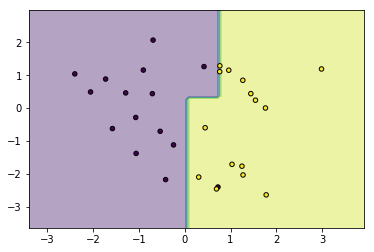

In [5]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4)
model.fit(X, y)
# set min and max values for the x and y axes
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
a = np.arange(x_min, x_max, 0.1)
b = np.arange(y_min, y_max, 0.1)
# build a grid of each unique combination of x and y
xx, yy = np.meshgrid(a, b)
# make predictions for every combination of x and y on that grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# draw the classification boundary
plt.contourf(xx, yy, Z, alpha=0.4)
# adds the points in our training data
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.show()

Beautiful. Another terrible model. It draws boundaries around the examples it should, but the patterns it found make no sense, and probably don’t extrapolate to new examples.

# Let’s fit the data now just for fun

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


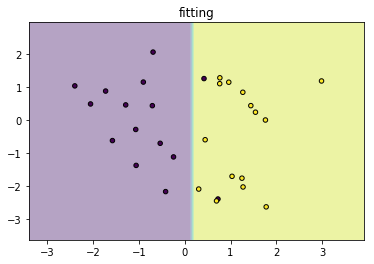

In [6]:
from sklearn.linear_model import LinearRegression,LogisticRegression
model = LogisticRegression()
model.fit(X, y)
# set min and max values for the x and y axes
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
a = np.arange(x_min, x_max, 0.1)
b = np.arange(y_min, y_max, 0.1)
# build a grid of each unique combination of x and y
xx, yy = np.meshgrid(a, b)
# make predictions for every combination of x and y on that grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# draw the classification boundary
plt.contourf(xx, yy, Z, alpha=0.4)
# adds the points in our training data
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.title('fitting')
plt.show()

Great. Not perfect. But much better than the prior 2.
There you have it. Under fitting, overfitting, and just plan fitting.
We intentionally chose a simplistic 2 feature dataset so you could see decision boundaries on the chart.